In [137]:
#-*- coding:utf-8 -*-

# pandas import 
import pandas as pd

# numpy import
import numpy as np

# Graph lib import 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# heatmap
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

raw_data = pd.read_csv('./data/raw.csv')

raw_data

,NO,q1,q1a,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,...,q15,q16a,q16b,chasu,nat,city,sex,edu,job,age
0,1,2,3,3,5,4,5.0,3,3,4,...,3,4,4,12,12,1328,1,3,3,4
1,2,2,3,4,4,3,4.0,4,5,5,...,4,4,4,12,3,401,1,1,3,3
2,3,1,1,5,5,5,5.0,5,5,5,...,5,3,5,12,12,1304,1,1,99,2
3,4,1,1,4,4,4,5.0,4,3,4,...,4,4,5,12,3,401,1,2,8,1
4,5,2,3,3,4,5,5.0,5,4,4,...,5,4,4,12,3,401,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,11991,2,2,5,4,4,5.0,4,4,2,...,4,4,4,1,10,1001,1,2,12,2
11991,11992,2,2,5,5,5,3.0,4,4,5,...,4,4,4,1,15,5057,2,2,8,1
11992,11993,2,3,5,5,5,5.0,5,5,5,...,5,5,5,1,9,961,2,2,12,1
11993,11994,2,4,5,5,5,3.0,5,5,5,...,5,5,5,1,97,5350,1,2,2,2


In [80]:
revisit = raw_data[["q1","q1a"]]
revisit_group = revisit.groupby(["q1"]).mean()
# 재 방문한 여행객은 평균 3.177 회 방문하였다.
revisit_group

,q1a
q1,
1,1.000000
2,3.177299


In [64]:
# 재 방문 여행객 필터링 q1 == 2
revisit_filter = raw_data[raw_data['q1'] == 2]

revisit_filter

,NO,q1,q1a,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,...,q15,q16a,q16b,chasu,nat,city,sex,edu,job,age
0,1,2,3,3,5,4,5.0,3,3,4,...,3,4,4,12,12,1328,1,3,3,4
1,2,2,3,4,4,3,4.0,4,5,5,...,4,4,4,12,3,401,1,1,3,3
4,5,2,3,3,4,5,5.0,5,4,4,...,5,4,4,12,3,401,2,2,3,1
6,7,2,2,5,5,5,5.0,5,5,5,...,5,5,5,12,14,1701,1,2,5,2
18,19,2,4,5,5,5,5.0,5,5,8,...,5,4,4,12,7,5410,2,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,11991,2,2,5,4,4,5.0,4,4,2,...,4,4,4,1,10,1001,1,2,12,2
11991,11992,2,2,5,5,5,3.0,4,4,5,...,4,4,4,1,15,5057,2,2,8,1
11992,11993,2,3,5,5,5,5.0,5,5,5,...,5,5,5,1,9,961,2,2,12,1
11993,11994,2,4,5,5,5,3.0,5,5,5,...,5,5,5,1,97,5350,1,2,2,2


In [102]:
# 재방문 횟수별 상관관계
revisit_cnt = revisit_filter[["q1a", "q13a01", "q13a02", 
                              "q13a03","q13a04","q13a05",
                              "q13a06","q13a07","q13a08",
                              "q13a09","q13a10"]]

revisit_group = revisit_cnt.groupby([revisit_filter["q1a"],revisit_filter["q13a01"]]).count()

# cross tab
pd.crosstab(revisit_cnt["q1a"], [revisit_cnt["q13a01"]], margins=True)

q13a01,1,2,3,4,5,All
q1a,,,,,,
2,13,28,195,758,615,1609
3,6,29,113,414,308,870
4,35,74,424,1013,944,2490
All,54,131,732,2185,1867,4969


In [104]:
# 재방문 여부	q1
# 재방문 횟수	q1a
# 출입국 절차 만족	q13a01
# 대중교통 만족	q13a02
# 숙박 만족	q13a03
# 음식 만족	q13a04
# 쇼핑 만족	q13a05
# 관광지매력도 만족	q13a06
# 관광서비스 만족	q13a07
# 언어소통 만족	q13a08
# 여행경비 만족	q13a09
# 치안 만족	q13a10
# 재방문 의사	q14
# 추천 의사	q15
# 여행 전 한국 이미지	q16a
# 여행 후 한국 이미지	q16b
# 조사기간월	chasu
# 거주국별	nat
# 거주도시	city
# 성별	sex
# 학력별	edu
# 직업별	job
# 연령별	age


revisit_cnt.columns = ["재방문 횟수","출입국 절차 만족", "숙박 만족", 
                       "음식 만족", "쇼핑 만족", "음식 만족",
                       "관광지매력도 만족", "관광서비스 만족", "언어소통 만족",
                       "여행경비 만족", "치안 만족" ]

revisit_cnt = revisit_cnt.drop('재방문 횟수', axis=1)

revisit_cnt

# correlation
revisit_cnt.corr()

,출입국 절차 만족,숙박 만족,음식 만족,쇼핑 만족,음식 만족,관광지매력도 만족,관광서비스 만족,언어소통 만족,여행경비 만족,치안 만족
출입국 절차 만족,1.000000,0.509026,0.342281,0.280393,0.185067,0.144308,0.122395,0.327269,0.413971,0.454186
숙박 만족,0.509026,1.000000,0.467154,0.377311,0.238347,0.158332,0.165835,0.368143,0.437613,0.586437
음식 만족,0.342281,0.467154,1.000000,0.408335,0.230476,0.181157,0.182187,0.299630,0.366338,0.445522
쇼핑 만족,0.280393,0.377311,0.408335,1.000000,0.243201,0.213743,0.188876,0.374626,0.418302,0.374841
음식 만족,0.185067,0.238347,0.230476,0.243201,1.000000,0.297074,0.383453,0.148263,0.196451,0.268517
관광지매력도 만족,0.144308,0.158332,0.181157,0.213743,0.297074,1.000000,0.641931,0.148661,0.156009,0.164404
관광서비스 만족,0.122395,0.165835,0.182187,0.188876,0.383453,0.641931,1.000000,0.169423,0.181652,0.189645
언어소통 만족,0.327269,0.368143,0.299630,0.374626,0.148263,0.148661,0.169423,1.000000,0.573681,0.389037
여행경비 만족,0.413971,0.437613,0.366338,0.418302,0.196451,0.156009,0.181652,0.573681,1.000000,0.540277
치안 만족,0.454186,0.586437,0.445522,0.374841,0.268517,0.164404,0.189645,0.389037,0.540277,1.000000


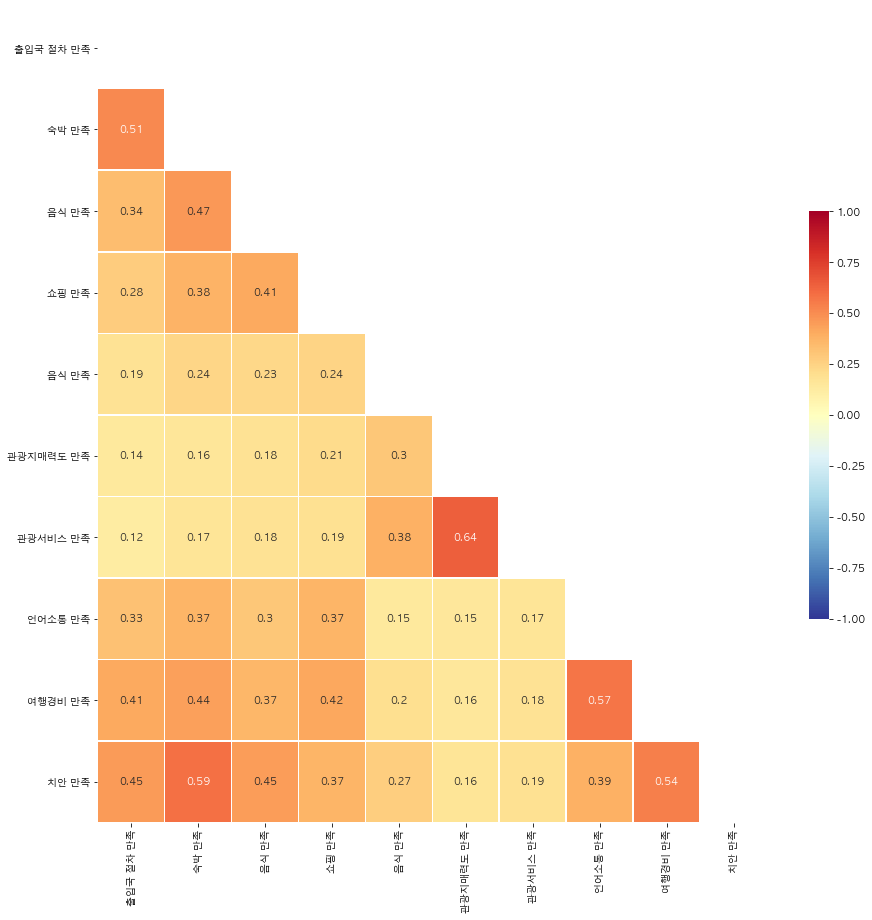

In [106]:
plt.figure(figsize=(15,15))


# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(revisit_cnt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(revisit_cnt.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

#sns.clustermap(revisit_cnt.corr(), 
#               annot = True,        # 실제 값 화면에 나타내기
#               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
#               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
#              )

#sns.heatmap(data = revisit_cnt.corr(), annot=True, 
#            fmt = '.2f', linewidths=.5, cmap='Blues')

In [108]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

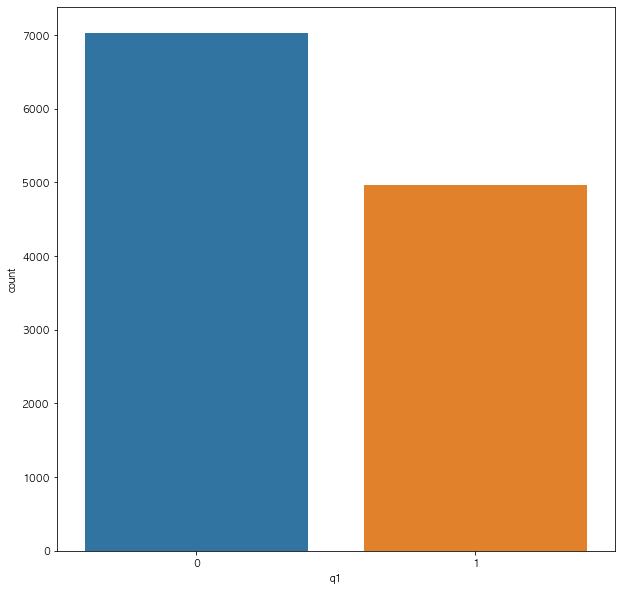

In [143]:
# raw_data['q1']=raw_data['q1'].replace(1,-1)
# raw_data['q1']=raw_data['q1'].replace(2,1)
# raw_data['q1']=raw_data['q1'].replace(-1,0)

plt.figure(figsize=(10,10))
sns.countplot(x='q1', data=raw_data)
plt.show()


In [163]:
raw_data.describe()

logistic_data = raw_data.copy().drop("NO", axis=1)
logistic_data = logistic_data.copy().drop("city", axis=1)

logistic_data.describe()

,q1,q1a,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,q13a08,...,q14,q15,q16a,q16b,chasu,nat,sex,edu,job,age
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11994.000000,11995.000000,11995.000000,11995.000000,11995.000000,...,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000
mean,0.414256,1.901959,4.266611,4.353647,4.428429,4.319576,4.676782,4.490704,4.555732,3.804919,...,4.234931,4.303126,4.057024,4.355898,6.522718,10.554648,1.531221,2.187578,5.430346,1.975406
std,0.492614,1.216196,0.788834,0.715128,0.773568,0.726966,1.155635,0.993631,1.256747,0.909050,...,0.796962,0.674695,0.668935,0.635747,3.467140,20.348676,0.499045,0.808387,4.158589,1.245092
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,1.000000,2.000000,3.000000,1.000000
50%,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,7.000000,5.000000,2.000000,2.000000,5.000000,2.000000
75%,1.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,10.000000,10.000000,2.000000,2.000000,8.000000,3.000000
max,1.000000,4.000000,5.000000,5.000000,8.000000,5.000000,8.000000,8.000000,8.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,12.000000,97.000000,2.000000,9.000000,99.000000,9.000000


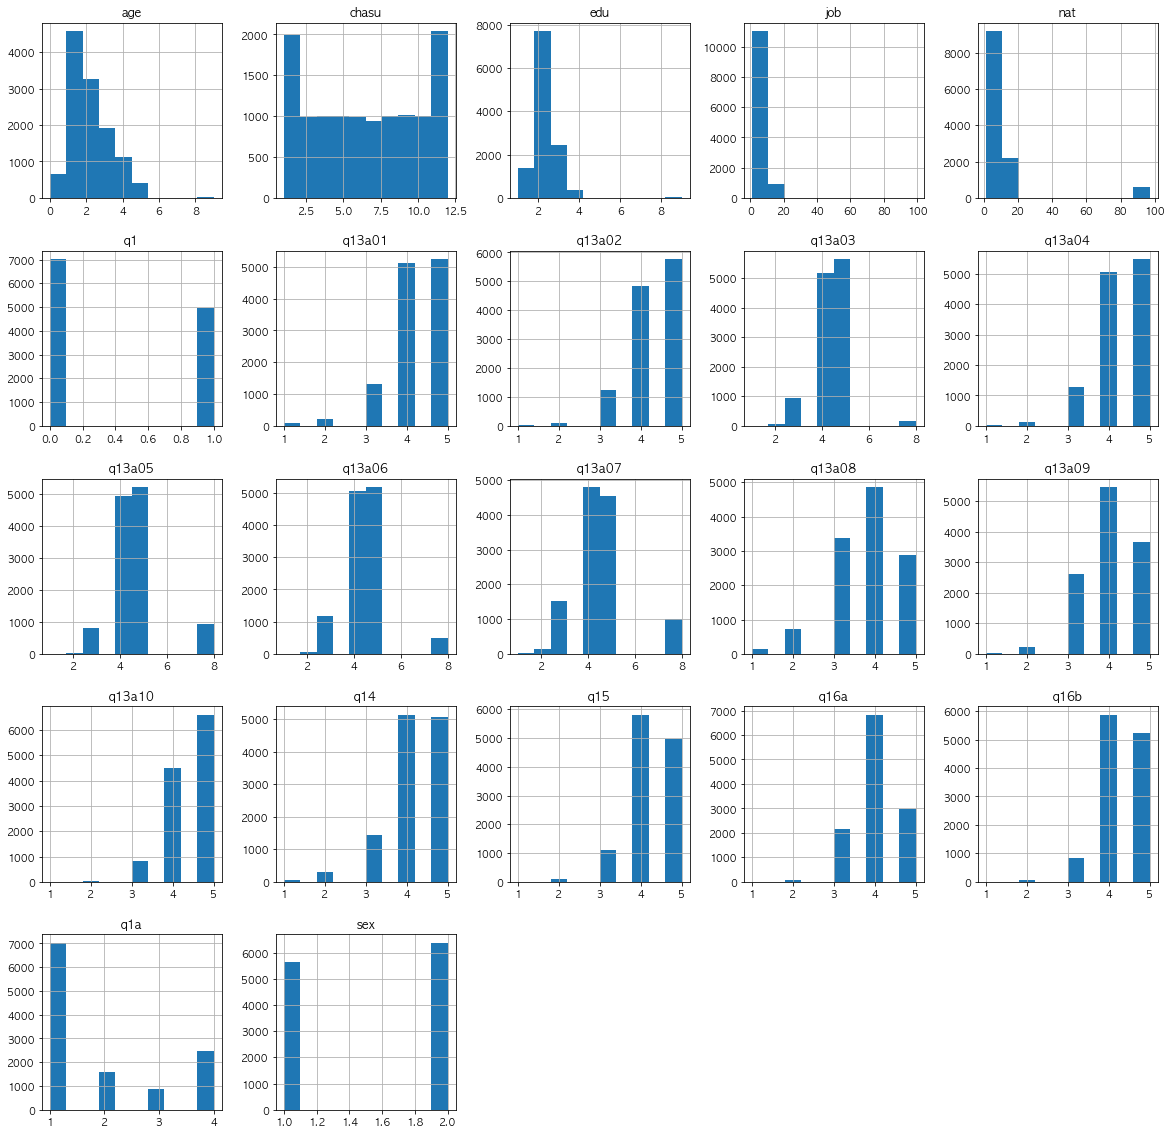

In [170]:
logistic_hist = logistic_data.hist(figsize=(20,20))


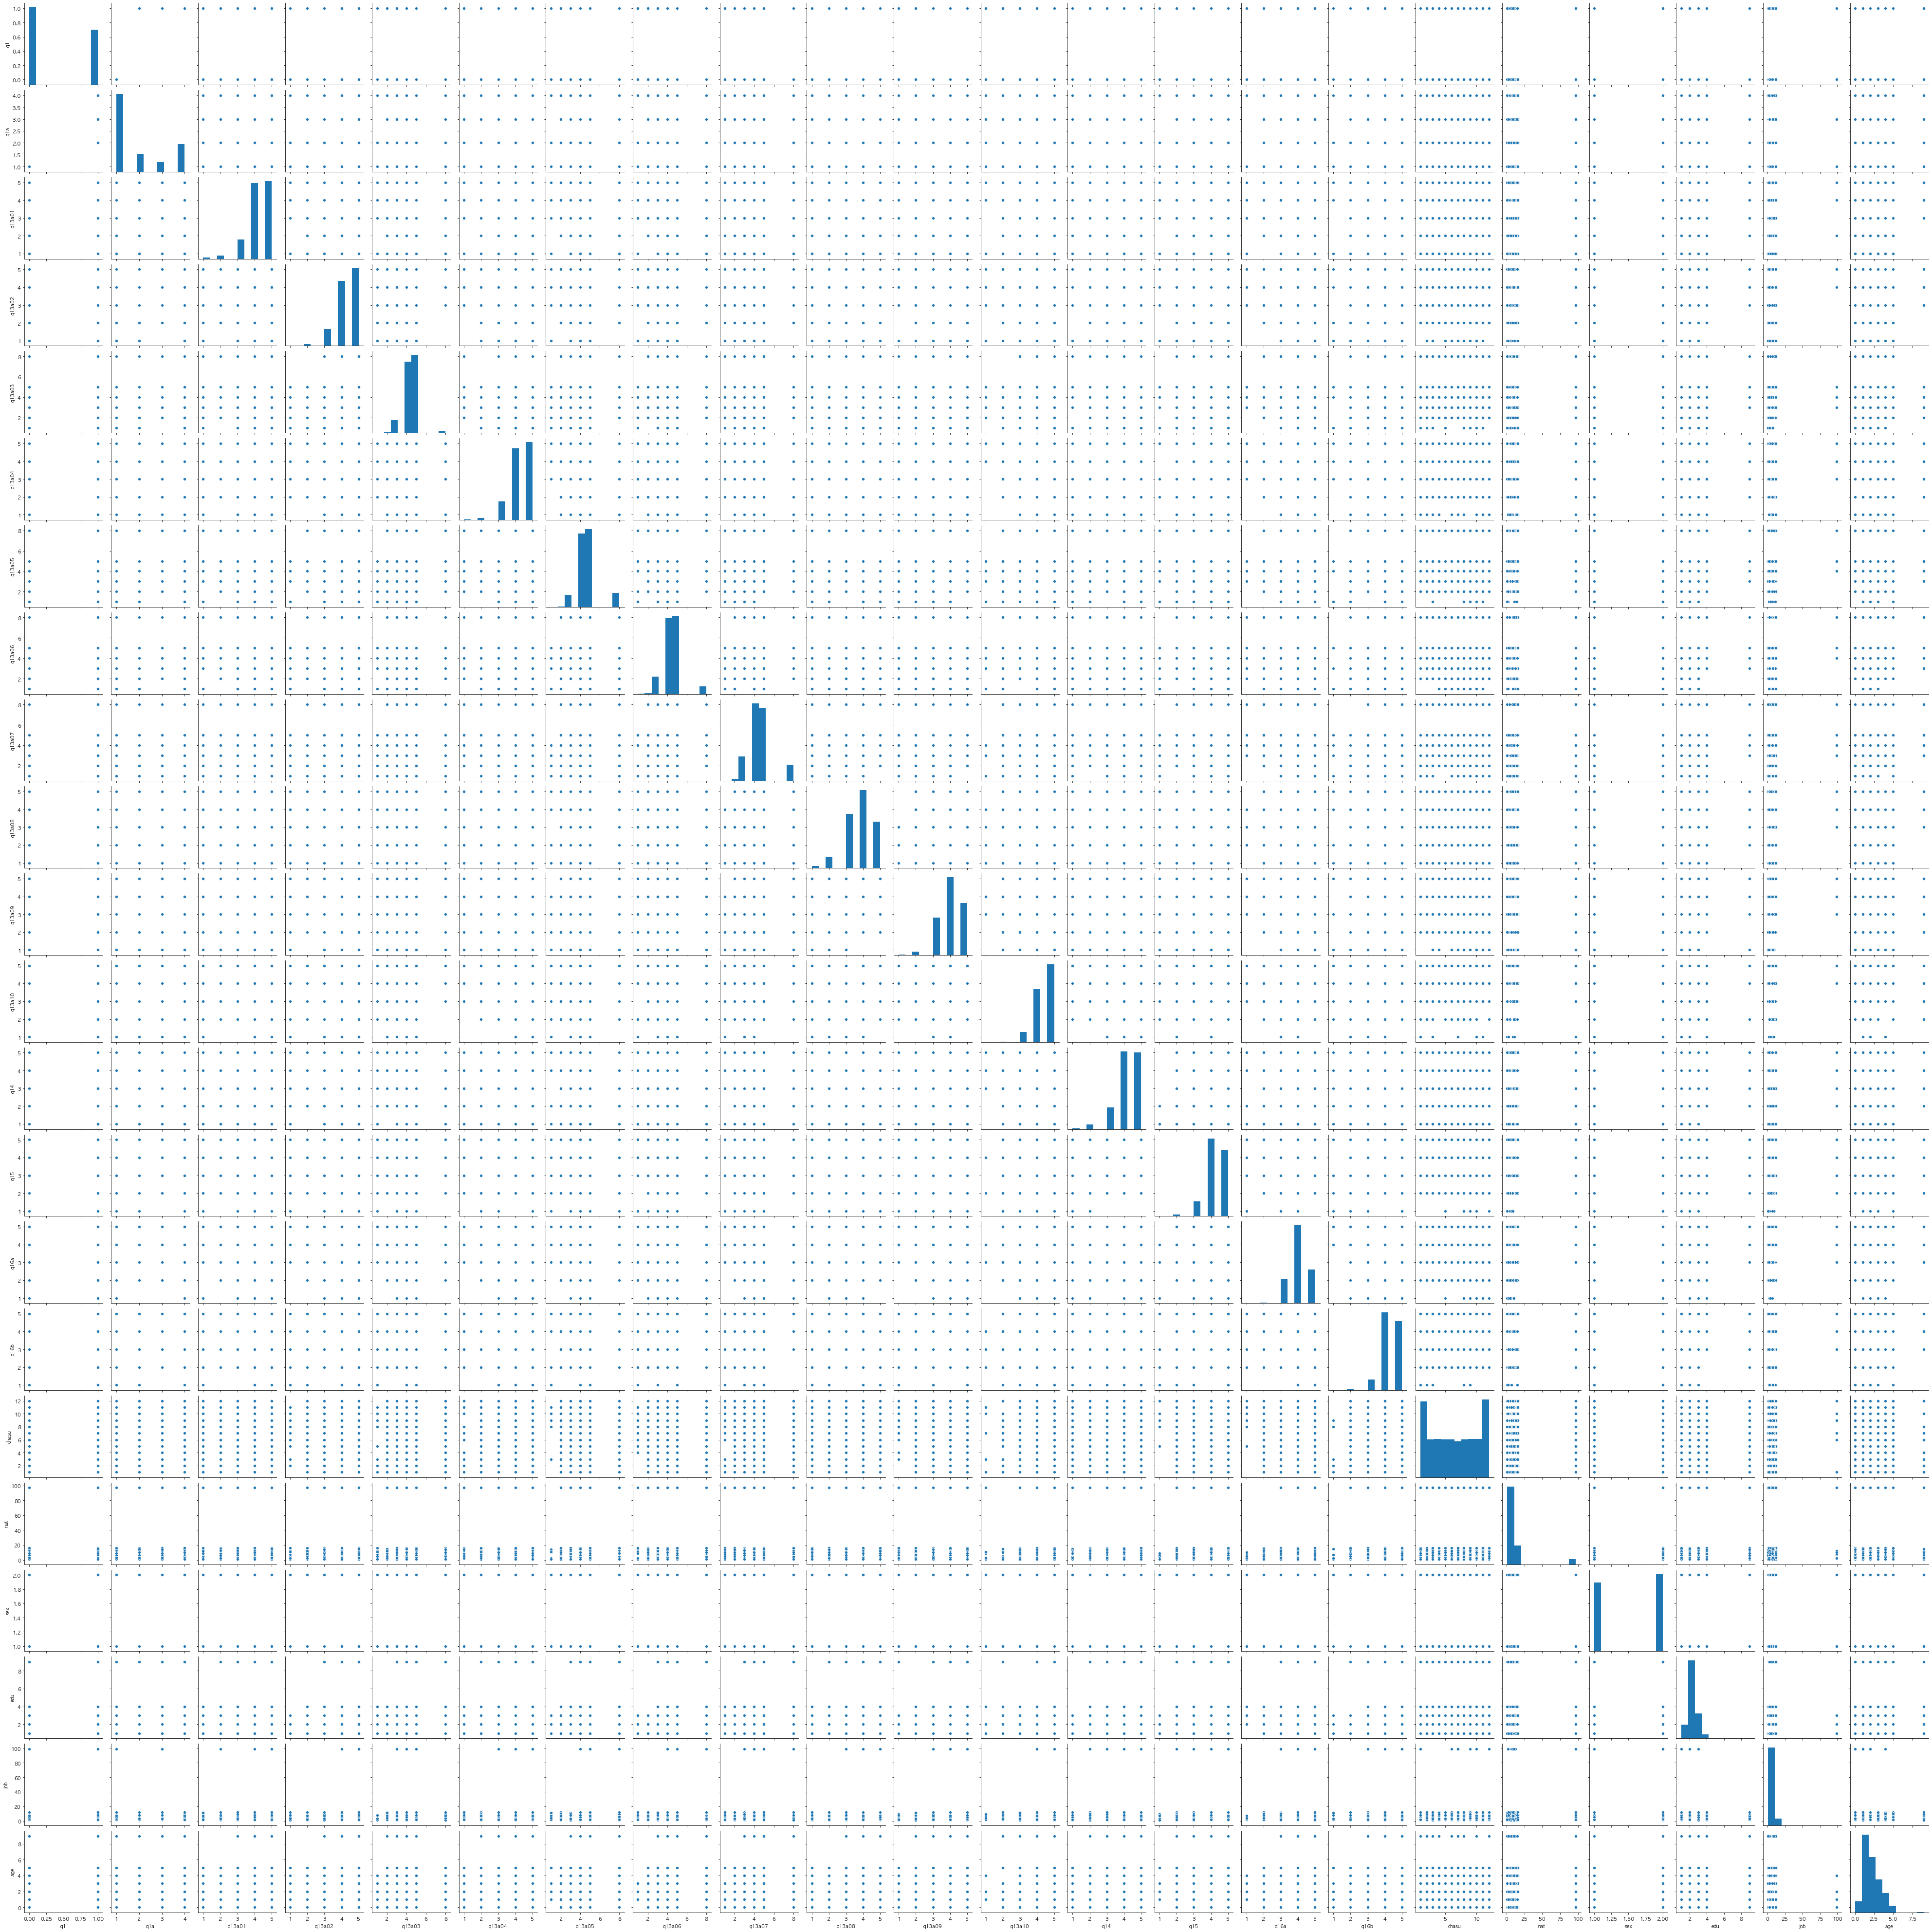

In [187]:
# revisit_cnt.corr()
# revisit_cnt.hist(figsize=(15,15))

sns.pairplot(logistic_data)
plt.show()

In [188]:
logistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11995 entries, 0 to 11994
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      11995 non-null  int64  
 1   q1a     11995 non-null  int64  
 2   q13a01  11995 non-null  int64  
 3   q13a02  11995 non-null  int64  
 4   q13a03  11995 non-null  int64  
 5   q13a04  11994 non-null  float64
 6   q13a05  11995 non-null  int64  
 7   q13a06  11995 non-null  int64  
 8   q13a07  11995 non-null  int64  
 9   q13a08  11995 non-null  int64  
 10  q13a09  11995 non-null  int64  
 11  q13a10  11995 non-null  int64  
 12  q14     11995 non-null  int64  
 13  q15     11995 non-null  int64  
 14  q16a    11995 non-null  int64  
 15  q16b    11995 non-null  int64  
 16  chasu   11995 non-null  int64  
 17  nat     11995 non-null  int64  
 18  sex     11995 non-null  int64  
 19  edu     11995 non-null  int64  
 20  job     11995 non-null  int64  
 21  age     11995 non-null  int64  
dty

In [198]:
logistic_data['q13a04'] = logistic_data['q13a04'].fillna(0).astype(int)

logistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11995 entries, 0 to 11994
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   q1      11995 non-null  int64
 1   q1a     11995 non-null  int64
 2   q13a01  11995 non-null  int64
 3   q13a02  11995 non-null  int64
 4   q13a03  11995 non-null  int64
 5   q13a04  11995 non-null  int64
 6   q13a05  11995 non-null  int64
 7   q13a06  11995 non-null  int64
 8   q13a07  11995 non-null  int64
 9   q13a08  11995 non-null  int64
 10  q13a09  11995 non-null  int64
 11  q13a10  11995 non-null  int64
 12  q14     11995 non-null  int64
 13  q15     11995 non-null  int64
 14  q16a    11995 non-null  int64
 15  q16b    11995 non-null  int64
 16  chasu   11995 non-null  int64
 17  nat     11995 non-null  int64
 18  sex     11995 non-null  int64
 19  edu     11995 non-null  int64
 20  job     11995 non-null  int64
 21  age     11995 non-null  int64
dtypes: int64(22)
memory usage: 2.0 MB


In [199]:
x = logistic_data.copy().drop('q1', axis=1)
y = logistic_data[['q1']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [200]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
y_predicted = mlr.predict(x_test)

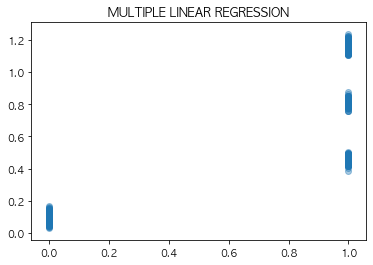

In [203]:
plt.scatter(y_test, y_predicted, alpha=0.4)
# plt.xlabel("Actual Rent")
# plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

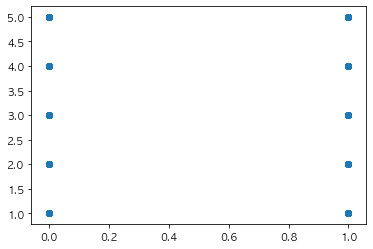

In [211]:
plt.scatter(logistic_data[['q1']], logistic_data[['q13a01']], alpha=0.4)
plt.show()